In [235]:
#%matplotlib inline
import moviepy.editor
import numpy as np
#import matplotlib.pyplot as plt

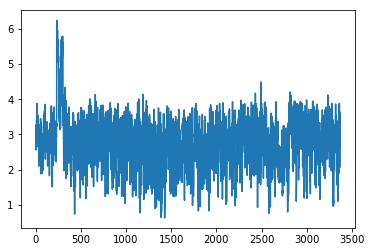

In [234]:
clip = moviepy.editor.VideoFileClip("sample.mp4")
cut = lambda i: clip.audio.subclip(i,i+1).to_soundarray(fps=22000)
volume = lambda array: np.sqrt(((1.0*array)**2).mean())
volumes = [volume(cut(i)) for i in range(0,int(clip.duration))]
amp_volumes=[i*100 for i in volumes]
plt.plot(amp_volumes)

In [40]:
len(amp_volumes)

3372

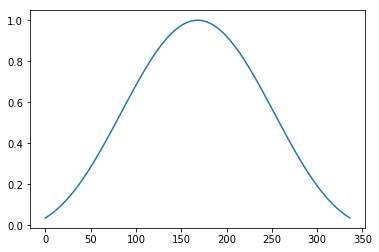

In [200]:
kaiser_func=np.kaiser(int(clip.duration)/10,5)
plt.plot(kaiser_func)

In [201]:
sound_unscaled = np.convolve(kaiser_func/kaiser_func.sum(),amp_volumes,mode='same')
#maxv1=max(sound_unscaled)
#soundnew=100*sound_unscaled*(1-(sum(sound_unscaled)/maxv1)/len(sound_unscaled))/maxv1

In [204]:
len(sound_unscaled)
max_val=max(sound_unscaled) 
#scaling the values between 0 to 100
sound_activity= sound_unscaled*100/max_val

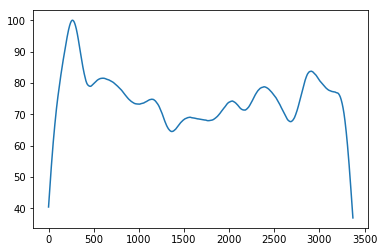

In [238]:
import matplotlib.pyplot as plttt

plttt.plot(sound_activity)


In [154]:
print(sound_activity)

[ 40.48008623  40.91422381  41.34678964 ...,  37.8299536   37.41394124
  36.99866449]


In [155]:
len(sound_activity)

3372

In [207]:
def get_filtered_peaks(smooth_curve):
    #find peaks from the curve
    increases = np.diff(smooth_curve)[:-1]>=0
    decreases = np.diff(smooth_curve)[1:]<=0
    peaks_position = (increases * decreases).nonzero()[0]
    #print (peaks_position)
    peaks_value = smooth_curve[peaks_position]
    #peaks_position = peaks_position[peaks_value>np.percentile(peaks_value,10)]
    
    #filter two close (5 seconds apart) peaks
    final_peaks_position=[peaks_position[0]]
    for fr_num in peaks_position:
        if (fr_num - final_peaks_position[-1]) < 5:
            if smooth_curve[fr_num] > smooth_curve[final_peaks_position[-1]]:
                final_peaks_position[-1] = fr_num
        else:
            final_peaks_position.append(fr_num)

    #final_times = [i for i in final_peaks_position]
    return final_peaks_position
    

final_cuts_times = get_filtered_peaks(sound_activity)
print(final_cuts_times)

#final = moviepy.editor.concatenate([clip.subclip(max(t-5,0),min(t+5, clip.duration))
#                     for t in final_cuts_times])
#final.to_videofile('soccer_summary.mp4')

[265, 464, 575, 581, 594, 599, 604, 612, 629, 959, 974, 990, 995, 1001, 1027, 1033, 1138, 1143, 1153, 1372, 1560, 1565, 1589, 1597, 1602, 1645, 1652, 1658, 1673, 1687, 1705, 1716, 1725, 1737, 1769, 1782, 1789, 2025, 2035, 2165, 2170, 2367, 2389, 2678, 2905, 3126, 3141, 3146, 3170]
